# Evaluación módulo 3

In [ ]:
# importar las librerías necesarias

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Evaluar linealidad de las relaciones entre las variables y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

### Exploración inicial

In [7]:
df_customer_flight = pd.read_csv("C:\\Users\\carol\\Desktop\\Evaluaciones\\Modulo 3\\Customer Flight Activity (1) (2).csv")
df_customer_flight

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [8]:
df_customer_loyalty = pd.read_csv("C:\\Users\\carol\\Desktop\\Evaluaciones\\Modulo 3\\Customer Loyalty History (1) (2).csv")
df_customer_loyalty

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


In [14]:
df_customer_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [15]:
df_customer_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

#### Duplicados

In [ ]:
# Verificar existencia de duplicados en df_customer_loyalty
df_customer_loyalty.duplicated().sum() 

0

In [ ]:
# Verificar existencia de duplicados en df_customer_flight
df_customer_flight.duplicated().sum() 

1864

In [28]:
# Filtrar todas las filas que están completamente duplicadas
df_customer_flight[df_customer_flight.duplicated(keep=False)]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
226,112142,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
477,126100,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405111,971370,2018,12,0,0,0,0,0.0,0,0
405409,988392,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0
405436,989528,2018,12,0,0,0,0,0.0,0,0


In [31]:
# Eliminar filas completamente duplicadas en todas las columnas
df_customer_flight = df_customer_flight.drop_duplicates()

In [ ]:
# Verificar duplicados luego de la eliminación.
df_customer_flight.duplicated().sum() 

0

#### Nulos

In [ ]:
# Nulos en todo el dataframe
df_customer_flight.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [37]:
# Nulos en todo el dataframe
df_customer_loyalty.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

### Limpieza de datos

#### Imputación de nulos

In [38]:
# % nulos
nulos = df_customer_loyalty.isnull().sum()/df_customer_loyalty.shape[0]*100
# % nulos ordenados de mayor a menor
nulos.sort_values(ascending=False)

Cancellation Year     87.650117
Cancellation Month    87.650117
Salary                25.321145
Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
dtype: float64

In [ ]:
# en este punto como las variables 'Cancellation Year' y 'Cancellation Month' tienen muy alto porcentaje de nulos y no son
# relevantes en nuestro estudio, las eliminaremos

In [39]:
df_customer_loyalty = df_customer_loyalty.drop(columns=['Cancellation Year', 'Cancellation Month'])

In [40]:
df_customer_loyalty

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4


In [ ]:
# Ahora analizo los nulos de la variable numérica 'Salary', que tiene un porcentaje alto de nulos, por ello utilizo 
# una técnica avanzada para la imputación. Antes aplico estadísticos para comparar luego de la imputación.

In [42]:
df_customer_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00


In [ ]:
# Numéricas - Técnicas Avanzadas, aplico dos pruebas para decidir luego cuales resultados se asemejan a los estadísticos
# antes de la imputación. 

In [45]:
# Copias del DataFrame original para no sobrescribir los datos
df_iterative = df_customer_loyalty.copy()
df_knn = df_customer_loyalty.copy()

# Imputación con IterativeImputer
imputer_iter = IterativeImputer(max_iter=10, random_state=42)
df_iterative['Salary'] = imputer_iter.fit_transform(df_iterative[['Salary']])

# Imputación con KNNImputer
imputer_knn = KNNImputer(n_neighbors=5)
df_knn['Salary'] = imputer_knn.fit_transform(df_knn[['Salary']])

# DataFrames guardados separadamente
# comparar sus estadísticas
print("Iterative Imputer - Estadísticas de Salary:")
print(df_iterative['Salary'].describe())

print("\nKNN Imputer - Estadísticas de Salary:")
print(df_knn['Salary'].describe())

Iterative Imputer - Estadísticas de Salary:
count     16737.000000
mean      79245.609409
std       30252.788756
min      -58486.000000
25%       63899.000000
50%       79245.609409
75%       82940.000000
max      407228.000000
Name: Salary, dtype: float64

KNN Imputer - Estadísticas de Salary:
count     16737.000000
mean      79245.609409
std       30252.788756
min      -58486.000000
25%       63899.000000
50%       79245.609409
75%       82940.000000
max      407228.000000
Name: Salary, dtype: float64


In [ ]:
# Como no hay diferencias entre los métodos elijo cualquiera, ya que los valores son parecidos a los estadísticos 
# antes de la imputación.

In [ ]:
# Guardo los cambios en el dataframe
df_customer_loyalty = df_iterative.copy()

In [48]:
df_customer_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.000000,Married,Star,3839.14,Standard,2016,2
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,79245.609409,Divorced,Star,3839.61,Standard,2016,3
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,79245.609409,Single,Star,3839.75,Standard,2014,7
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,79245.609409,Single,Star,3839.75,Standard,2013,2
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.000000,Married,Star,3842.79,Standard,2014,10


In [ ]:
# Unión de dataframe: 
# utilizo merge ya que tengo en común la columna 'Loyalty Number', y mantengo todos los datos con 'outer'.

In [49]:

df_customer = pd.merge(df_customer_loyalty, df_customer_flight, on='Loyalty Number', how='outer')

df_customer.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2017,1,3,0,3,1521,152.0,0,0
1,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2017,2,2,2,4,1320,132.0,0,0
2,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2018,10,6,4,10,3110,311.0,385,31
3,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2017,4,4,0,4,924,92.0,0,0
4,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2017,5,0,0,0,0,0.0,0,0


In [ ]:
# Analizo en general info del nuevo dataframe

In [50]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Country                      403760 non-null  object 
 2   Province                     403760 non-null  object 
 3   City                         403760 non-null  object 
 4   Postal Code                  403760 non-null  object 
 5   Gender                       403760 non-null  object 
 6   Education                    403760 non-null  object 
 7   Salary                       403760 non-null  float64
 8   Marital Status               403760 non-null  object 
 9   Loyalty Card                 403760 non-null  object 
 10  CLV                          403760 non-null  float64
 11  Enrollment Type              403760 non-null  object 
 12  Enrollment Year              403760 non-null  int64  
 13 

In [ ]:
# Identifico nulos que se podrían haber generado en la unión.

In [51]:
df_customer.isnull().sum()

Loyalty Number                 0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [ ]:
# También verifico los duplicados que se podrián haber generado.
df_customer.duplicated().sum()

0

In [ ]:
# Cambio los decimales mostrados de 'Salary' a dos redondeandolos

In [55]:
df_customer['Salary'] = df_customer['Salary'].round(2)

In [57]:
df_customer.sample(10)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
192297,529106,Canada,Ontario,Toronto,P1J 8T7,Male,Bachelor,72409.00,Married,Aurora,5380.90,Standard,2015,11,2017,9,2,0,2,672,67.0,0,0
124679,379038,Canada,Manitoba,Winnipeg,R2C 0M5,Male,Doctor,125825.00,Married,Nova,7609.09,Standard,2018,7,2017,3,0,0,0,0,0.0,0,0
258541,675848,Canada,Ontario,Kingston,M9K 2P4,Female,High School or Below,80919.00,Single,Star,2453.57,Standard,2012,6,2018,7,0,0,0,0,0.0,0,0
211769,572547,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,84015.00,Married,Nova,25807.06,Standard,2017,6,2017,4,0,0,0,0,0.0,0,0
229486,611366,Canada,Nova Scotia,Halifax,B3C 2M8,Female,Bachelor,65264.00,Divorced,Star,5656.20,Standard,2017,7,2017,1,0,0,0,0,0.0,0,0
75095,268145,Canada,Ontario,Toronto,P2T 6G3,Female,Doctor,198691.00,Divorced,Star,2395.57,Standard,2012,8,2017,10,12,4,16,3520,352.0,0,0
394679,978676,Canada,Quebec,Montreal,H2Y 4R4,Male,Bachelor,81669.00,Single,Star,5595.76,Standard,2016,3,2018,10,2,0,2,2876,287.0,0,0
116318,360031,Canada,Ontario,Toronto,M8Y 4K8,Male,College,79245.61,Married,Star,2357.50,Standard,2018,5,2017,12,0,0,0,0,0.0,0,0
217984,585039,Canada,British Columbia,Victoria,V10 6T5,Female,College,79245.61,Married,Nova,13352.56,Standard,2016,9,2018,7,6,6,12,3816,381.0,810,65
332326,838584,Canada,Quebec,Tremblant,H5Y 2S9,Female,College,79245.61,Married,Nova,10395.71,Standard,2016,5,2017,4,0,0,0,0,0.0,0,0


In [ ]:
# Guardo el dataframe como .csv

In [58]:
df_customer.to_csv("customer_final.csv", index=False)

### Visualización

####   ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [ ]:
# La mejor manera de visualizar de forma clara la cantidad de vuelos (variable numérica) por mes (variable categorica) 
# es un barplot.

In [ ]:
# podemos agregar el estimador de suma para que nos muestre el total de vuelos reservados por mes

Text(0, 0.5, 'Suma de vuelos reservados')

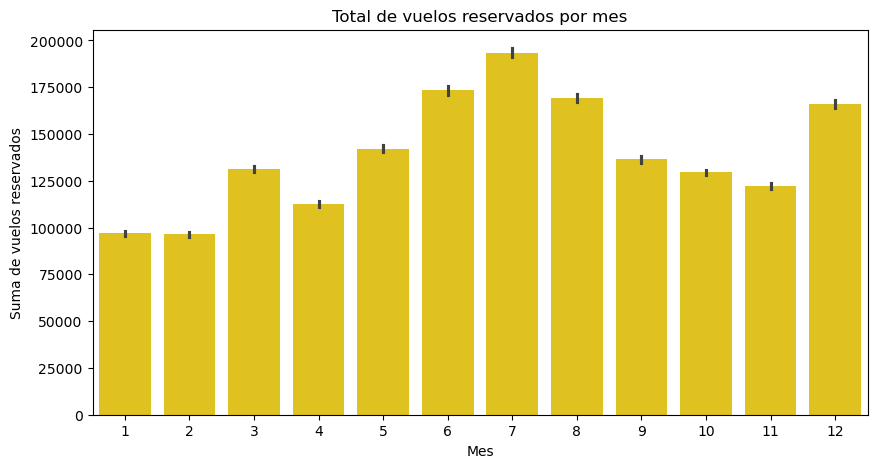

In [156]:
plt.figure(figsize=(10,5))
sns.barplot(x = "Month", 
            y = "Flights Booked", 
            data = df_customer,
            color='gold', 
            estimator=sum)

plt.title("Total de vuelos reservados por mes")
plt.xlabel("Mes")
plt.ylabel("Suma de vuelos reservados")


In [ ]:
 # Conclusión: La cantidad de vuelos reservados sigue un patrón estacional, con picos en verano (julio-agosto) y 
 # fin de año (diciembre), mientras que los meses iniciales del año tienen menor actividad. 

#### ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [ ]:
# Para analizar la relación entre 2 variables numéricas, el gráfico más adecuado es un gráfico de dispersión (scatter plot).

Text(0, 0.5, 'Puntos acumulados')

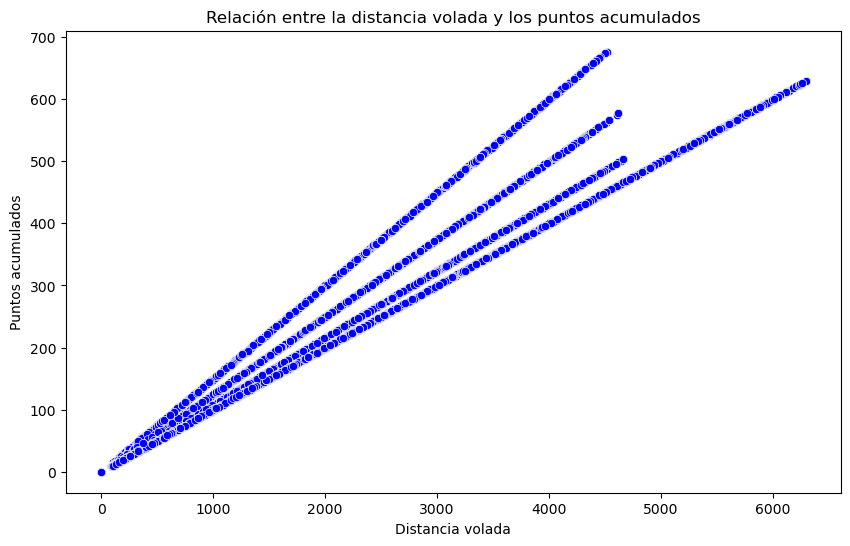

In [102]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Distance', 
                y='Points Accumulated',
                data = df_customer, 
                color='blue')

plt.title("Relación entre la distancia volada y los puntos acumulados")
plt.xlabel("Distancia volada")
plt.ylabel("Puntos acumulados")


In [ ]:
# Parece existir una relación positiva entre la distancia de los vuelos y los puntos acumulados por los clientes. 
# Cuanto mayor es la distancia del vuelo, mayor es la cantidad de puntos obtenidos. 
# Sin embargo, hay cierta variabilidad, lo que sugiere que otros factores (como tipo de tarifa o promociones) 
# pueden afectar la acumulación de puntos. 


#### ¿Cuál es la distribución de los clientes por provincia o estado?

In [ ]:
# Tengo una sola variable categórica para analizar, 'Province', utilizo un countplot

Text(0, 0.5, 'Provincia / Estado')

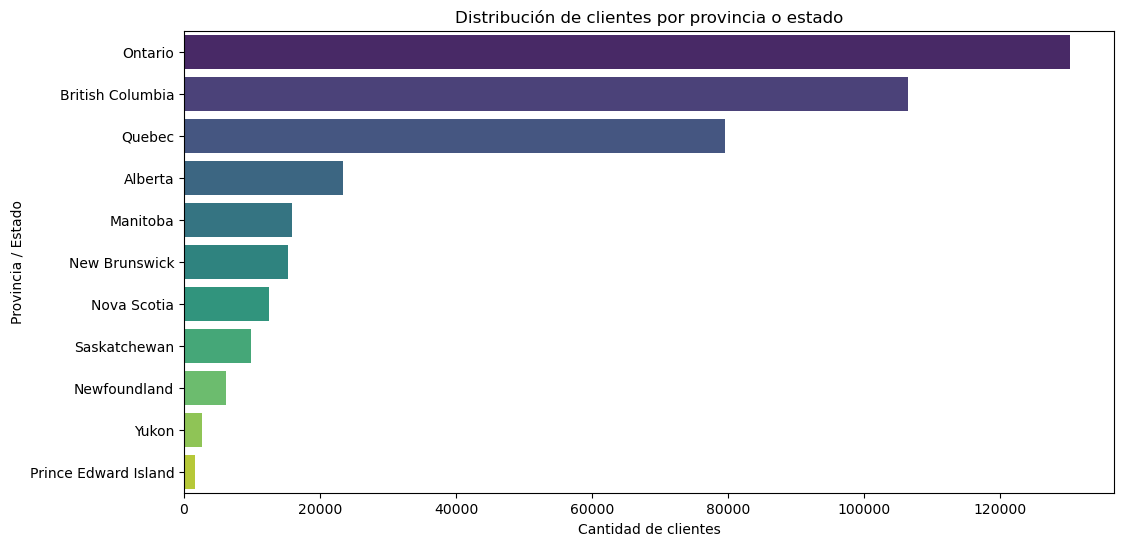

In [103]:
plt.figure(figsize=(12,6))
orden_province = df_customer['Province'].value_counts().index
sns.countplot(y="Province",
              data= df_customer, 
              order=orden_province, 
              palette="viridis")

plt.title("Distribución de clientes por provincia o estado")
plt.xlabel("Cantidad de clientes")
plt.ylabel("Provincia / Estado")


In [ ]:
# La distribución de clientes por provincia o estado no es uniforme, con algunas provincias acumulando una mayor 
# cantidad de clientes mientras que otras tienen menos. 


#### ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [ ]:
# para comparar el promedio (media) de 'Salary' (variable numérica) y los diferentes niveles educativos (variable categórica),
# el mejor gráfico es un barplot.

Text(0, 0.5, 'Salario promedio')

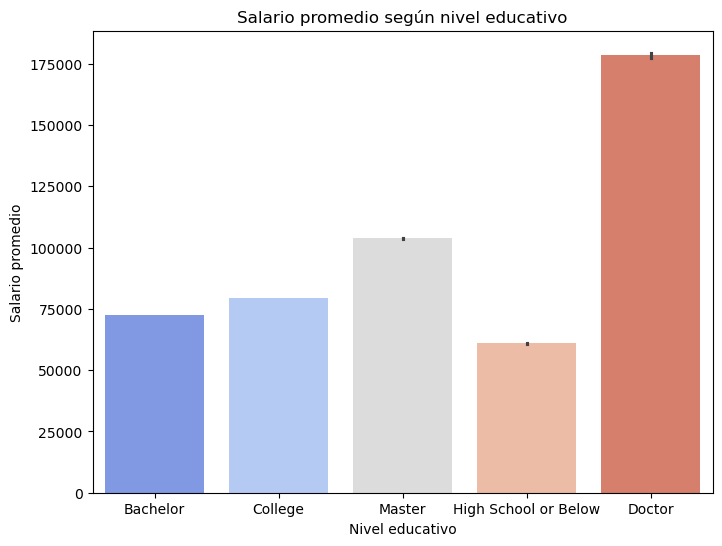

In [108]:
plt.figure(figsize=(8,6))
sns.barplot(x="Education", 
            y="Salary",
            data= df_customer, 
            estimator=np.mean, 
            palette="coolwarm")

plt.title("Salario promedio según nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario promedio")


In [ ]:
# El salario promedio aumenta con el nivel educativo, con los clientes con Doctorado obteniendo los ingresos más altos 
# y aquellos con educación secundaria o inferior teniendo los más bajos


#### ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [ ]:
# Para ver proporción de una variable categórica con pocas categorias sirve el gráfico pie.

In [ ]:
# Primeor agrupo los datos según las diferentes categorias de tarjetas
df_card = df_customer.groupby("Loyalty Card")["Loyalty Number"].count().reset_index()
df_card

,Loyalty Card,Loyalty Number
0,Aurora,83132
1,Nova,136883
2,Star,183745


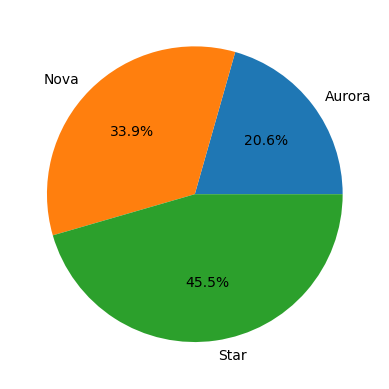

In [111]:
plt.pie("Loyalty Number", 
        labels= "Loyalty Card",
        autopct=  '%1.1f%%',
        data = df_card);

In [ ]:
# conclusión: La tarjeta Star es la más popular, con casi la mitad de los clientes usándola. La tarjeta Nova sigue 
# en segundo lugar con un tercio de la distribución, mientras que Aurora es la menos utilizada. Esto podría indicar 
# diferencias en beneficios, accesibilidad o tipos de clientes que prefieren cada tarjeta


#### ¿Cómo se distribuyen los clientes según su estado civil y género?

In [ ]:
# Analizamos la distribución dos variables categóricas, utilizamos un countplot con hue.

Text(0, 0.5, 'Cantidad de clientes')

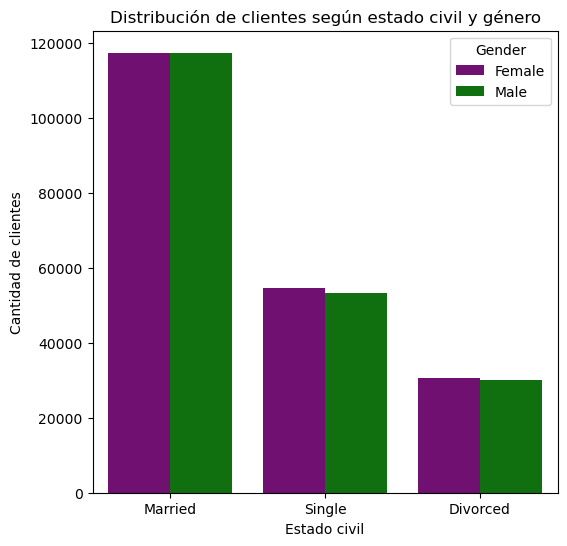

In [126]:
plt.figure(figsize=(6,6))
custom_palette = {"Female": "purple", "Male": "green"}


sns.countplot(x="Marital Status",
              data= df_customer, 
              hue="Gender", 
              palette= custom_palette)

plt.title("Distribución de clientes según estado civil y género")
plt.xlabel("Estado civil")
plt.ylabel("Cantidad de clientes")


In [ ]:
# La distribución de clientes muestra que la mayoría son casados, seguidos por solteros y, en menor medida, divorciados. 
# La proporción entre hombres y mujeres es bastante equilibrada en cada categoría


###  Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo (BONUS)

In [ ]:

# Comprobar si existen diferencias significativas en el número de vuelos reservados y el nivel educativo de los clientes

  #  H0: El número de vuelos reservados es el mismo en los dos niveles educativos.
  #  H1: El número de vuelos reservados no es el mismo en los dos niveles educativos.

# nivel significancia -> 0.05
# alpha = 0.05

In [144]:
# primero filtro a un dataframe las variables que necesito y verifico la info
df_filtered = df_customer[["Flights Booked", "Education"]]
print(df_filtered.head())  
print(df_filtered.info())  

   Flights Booked Education
0               3  Bachelor
1               2  Bachelor
2               6  Bachelor
3               4  Bachelor
4               0  Bachelor
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Flights Booked  403760 non-null  int64 
 1   Education       403760 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.2+ MB
None


In [152]:
#mostrar categorias únicas
categorias = df_filtered['Education'].unique()
print(categorias)


['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']


In [ ]:
# filtramos los datos para obtener dos grupos: nivel educativo bajo y nivel educativo alto
vuelos_educ_alto = df_filtered[df_filtered['Education'].isin(['Bachelor', 'Master', 'Doctor'])]['Flights Booked']
vuelos_educ_bajo = df_filtered[df_filtered['Education'].isin(['College', 'High School or Below'])]['Flights Booked']

In [ ]:
# vamos a definir una función para poder hacer los test 
def prueba_hipotesis(*args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versión de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney (alternativa no paramétrica).

    Parámetros:
    *args: listas o arrays con los datos de cada grupo.

    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis.
    """
    
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U (prueba no paramétrica)"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0 (Diferencias significativas)" if p_valor < alfa else "No se rechaza H0 (No hay diferencias significativas)"
    }

    # Imprimir resultados de manera más clara
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")

    return resultado

In [ ]:
# Tengo en este caso 2 muestras independientes una por cada nivel educativo

In [155]:
# Llamo a la función
prueba_hipotesis(vuelos_educ_alto, vuelos_educ_bajo)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Desiguales (p = 0.0049)
✅ Test aplicado: Mann-Whitney U (prueba no paramétrica)
📉 Estadístico: 17026171822.0000, p-valor: 0.0029
🔍 Conclusión: Rechazamos H0 (Diferencias significativas)



{'Test de Normalidad': [False, False],
 'Datos Normales': False,
 'p-valor Varianza': 0.0048587279888045185,
 'Varianzas Iguales': False,
 'Test Usado': 'Mann-Whitney U (prueba no paramétrica)',
 'Estadístico': 17026171822.0,
 'p-valor': 0.002942081262120518,
 'Conclusión': 'Rechazamos H0 (Diferencias significativas)'}

In [ ]:
# Valor p = 0.0029: Como este valor es menor que 0.05, se rechaza la hipótesis nula.
# Esto sugiere que hay una diferencia estadísticamente significativa en el número de vuelos reservados entre 
# los niveles educativos alto y bajo.

